In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
from src.pyth.preprocessing import *

sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.22.4 scipy==1.8.1 pandas==1.4.3 scikit-learn==1.1.1 statsmodels==0.13.2 pynndescent==0.5.7


normalizing counts per cell
    finished (0:00:00)


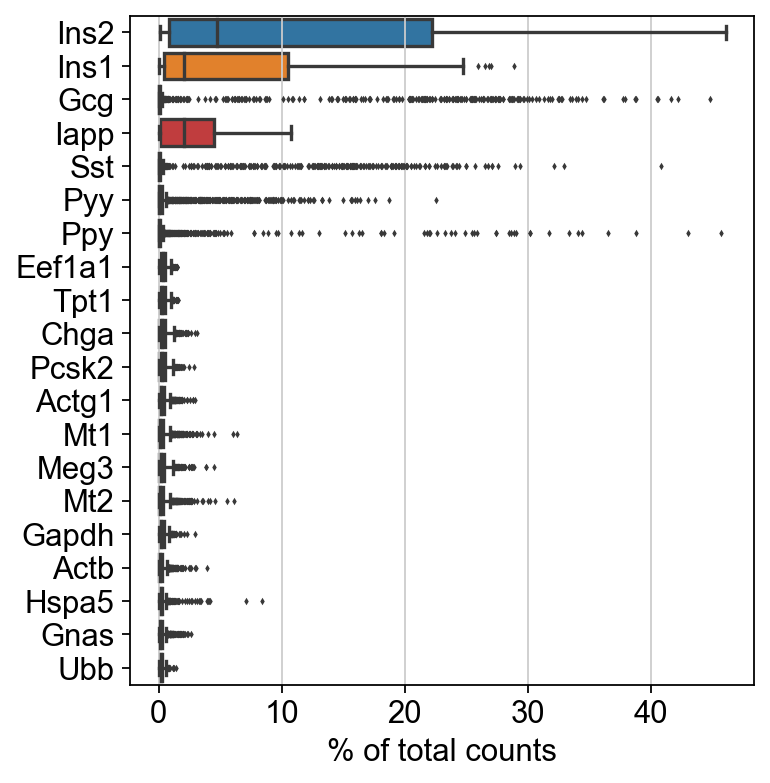

In [27]:
adata = prepare_adata("dataset/pancreas/pancreas_mouse_raw.csv")
sc.pl.highest_expr_genes(adata, n_top=20, )

In [28]:
sc.pp.filter_cells(adata, min_genes=200)

In [29]:
sc.pp.filter_genes(adata, min_cells=5)

filtered out 1225 genes that are detected in less than 5 cells


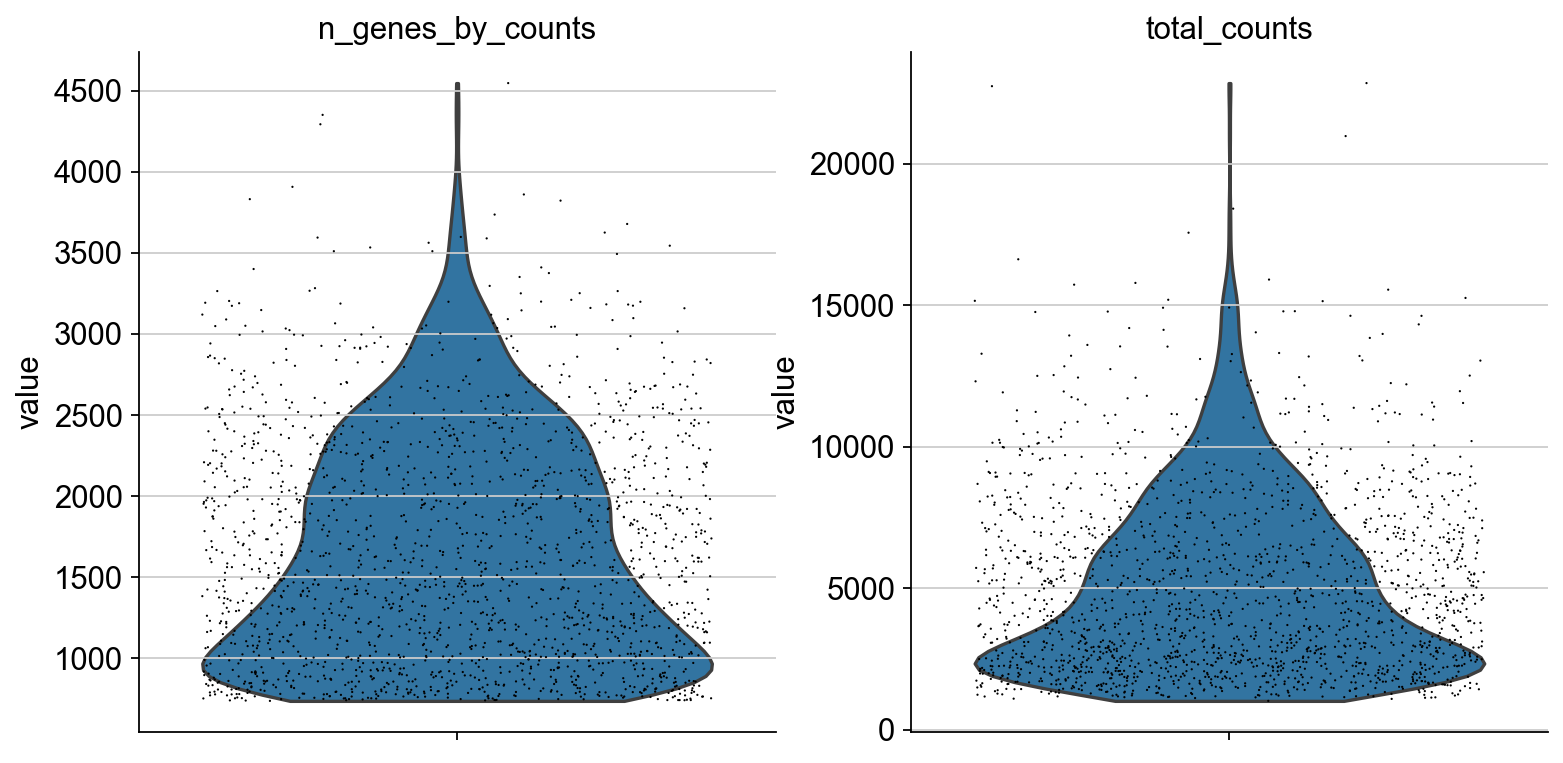

In [30]:
sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'], jitter=0.4, multi_panel=True)

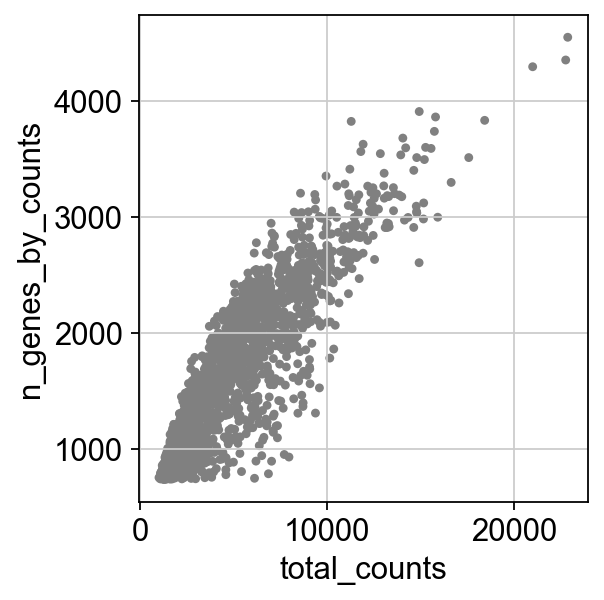

In [31]:
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [32]:
adata = adata[adata.obs.n_genes_by_counts < 4000, :]

In [33]:
adata.write("dataset/pancreas/pancreas_mouse_clean.h5ad", compression="gzip")

In [ ]:
sc.pp.normalize_total(adata, target_sum=1e6)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=2000)

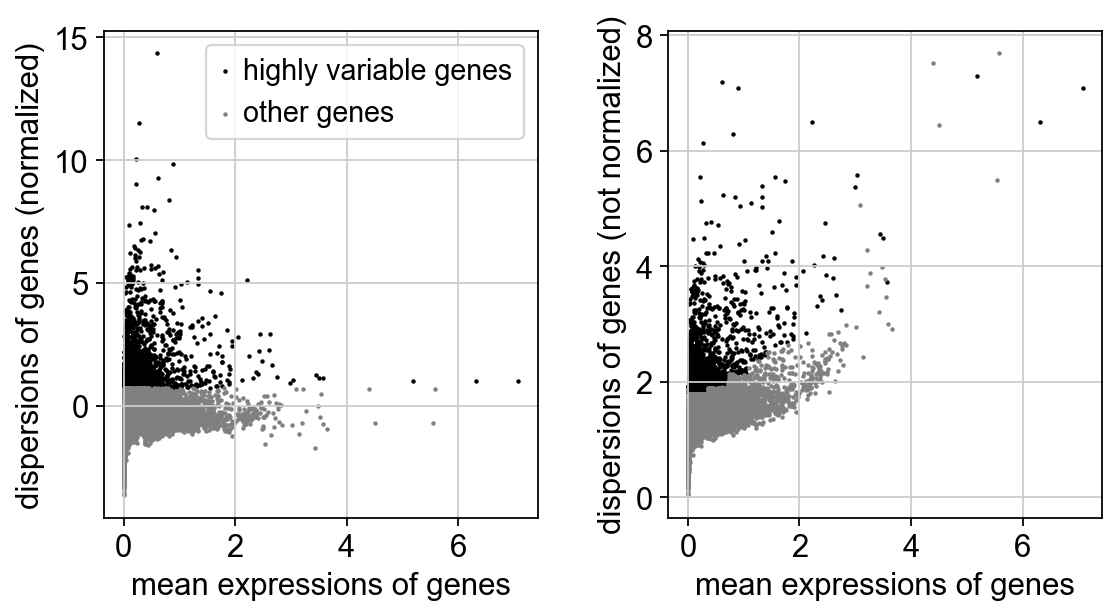

In [35]:
sc.pl.highly_variable_genes(adata)

In [36]:
adata.raw = adata
adata = adata[:, adata.var.highly_variable]
sc.pp.regress_out(adata, ['total_counts'])

regressing out ['total_counts']
    finished (0:00:08)


In [37]:
sc.pp.scale(adata, max_value=10)

In [ ]:
sc.pp.pca(adata, 50)

In [38]:
export_final("dataset/pancreas/pancreas_mouse_scanpy_pca.csv",
             "dataset/pancreas/pancreas_mouse_labels.csv". adata)